# **taking the plotting dataframe created in 1.2 and plotting all four early/late change/counts scatter plots together** 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pyqt_fit import plot_fit

ModuleNotFoundError: No module named 'pyqt_fit'

In [24]:
from pyqt_fit import plot_fit

ModuleNotFoundError: No module named 'pyqt_fit'

In [2]:
df = pd.read_csv("data/Data_dataframes/final_plotting_01_2x_coverage_2021_04_21.csv")

In [3]:
df.head()

,Unnamed: 0,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder
0,TGC,TGC,0.000030,-4.523276,0.161236,0.001774,-0.161588,0.001892,107.3,1.059292,86.5,0.972882,2829.1,4.954886,2604.6,4.115872
1,GCG,GCG,0.000293,-3.533051,-0.671613,0.001847,-0.935979,0.000920,551.6,1.435409,82.6,0.637495,2731.5,4.436271,1965.0,4.531666
2,CGG,CGG,0.000284,-3.546064,-0.641476,0.001077,-0.938726,0.000692,577.3,1.951948,96.5,0.576628,2744.0,4.376985,2220.9,4.658852
3,AGA,AGA,0.000030,-4.529189,0.122615,0.001321,0.327619,0.002391,97.5,1.188486,63.9,0.338969,3891.4,7.145236,3173.0,4.499333
4,GTT,GTT,0.000021,-4.681856,0.028296,0.001480,0.380779,0.005045,64.8,1.018627,134.0,1.218195,2683.8,6.229414,3448.9,6.014890


# **regression**

In [7]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [13]:
x = np.array(df.mut_log10).reshape((-1, 1))
y = np.array(df.change_2_mean)
model = LinearRegression().fit(x, y)

In [15]:
print("r^2: ", model.score(x, y))

r^2:  0.4264699676582788


In [18]:
est_mutChange = sm.OLS(y, sm.add_constant(x)).fit()

In [22]:
print(est_mutChange.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     46.10
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           4.96e-09
Time:                        20:12:13   Log-Likelihood:                -36.949
No. Observations:                  64   AIC:                             77.90
Df Residuals:                      62   BIC:                             82.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3778      0.647     -6.767      0.0

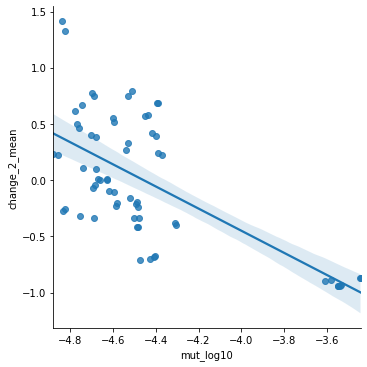

In [5]:
sns.lmplot(x="mut_log10", y="change_2_mean", data=df)